# 1. Linear Regression
### 공부 시간에 따른 점수
최소제곱법 사용

In [14]:
# 주피터 노트북 자동완성 설정
%config Completer.use_jedi = False

In [12]:
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pandas as pd # 판다스

In [18]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [20]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [25]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 (독립 변수)
y = dataset.iloc[:, -1].values # 마지막 컬럼의 데이터 (종속 변수)

In [27]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 학습 (모델 생성)

LinearRegression()

In [38]:
y_pred = reg.predict(X) # X에 대한 예측 
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

Text(0, 0.5, 'score')

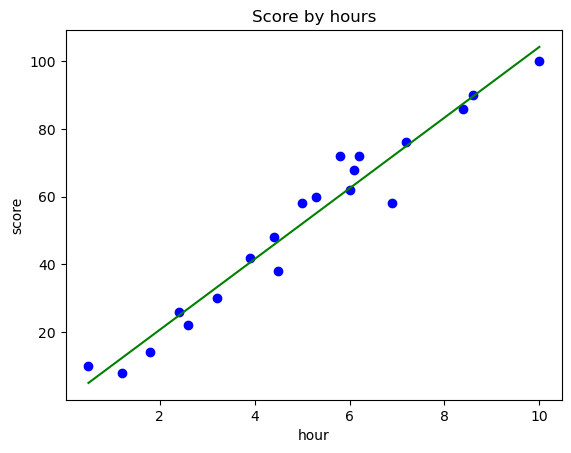

In [40]:
plt.scatter(X, y, color="blue") # 산점도 그래프
plt.plot(X, y_pred, color="green") # 선 그래프
plt.title("Score by hours") # 제목
plt.xlabel('hour') # X 축 이름
plt.ylabel('score') # Y 축 이름

In [42]:
print("9시간 공부했을 때 예상 점수 : ", reg.predict([[9]])) #predict 안에는 2차원 배열이 arg

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [43]:
reg.coef_ # 기울기

array([10.44369694])

In [44]:
reg.intercept_ # y 절편

-0.218484702867201

### 데이터 세트 분리

In [45]:
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pandas as pd # 판다스

In [46]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [48]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [49]:
from sklearn.model_selection import train_test_split # 학습 데이터, 검증 데이터 분리 라이브러리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) # 훈련 80 : 테스트 20 으로 분리

In [50]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [51]:
X_train, len(X_train) 

(array([[ 5. ],
        [ 3.2],
        [ 2.4],
        [ 5.3],
        [ 1.2],
        [ 8.4],
        [ 4.4],
        [ 7.2],
        [ 6.2],
        [ 1.8],
        [ 5.8],
        [ 3.9],
        [10. ],
        [ 6.1],
        [ 6.9],
        [ 4.5]]),
 16)

In [53]:
y_train, len(y_train)

(array([ 58,  30,  26,  60,   8,  86,  48,  76,  72,  14,  72,  42, 100,
         68,  58,  38]),
 16)

In [54]:
X_test, len(X_test)

(array([[6. ],
        [2.6],
        [8.6],
        [0.5]]),
 4)

In [55]:
y_test, len(y_test)

(array([62, 22, 90, 10]), 4)

### 분리된 데이터를 통한 모델링

In [57]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [58]:
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화 (훈련 세트)

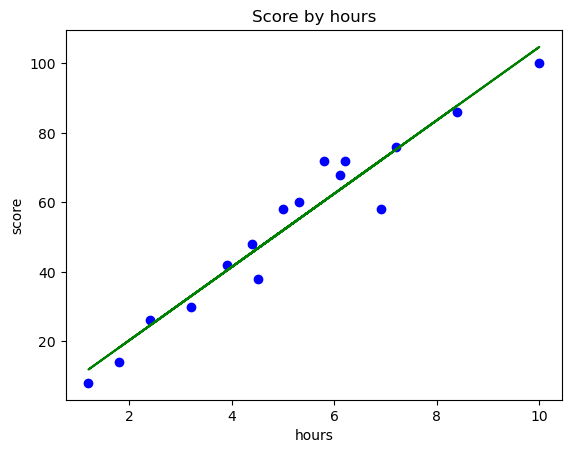

In [71]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, reg.predict(X_train), color="green")
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 데이터 시각화 (테스트 세트)

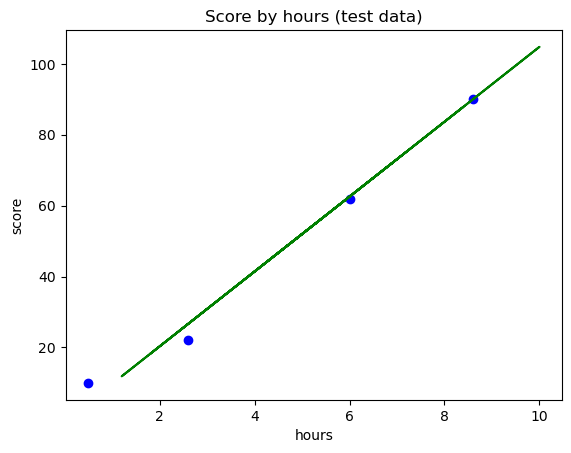

In [72]:
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_train, reg.predict(X_train), color="green")
plt.title("Score by hours (test data)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [73]:
reg.coef_ # 기울기

array([10.55767028])

In [74]:
reg.intercept_ # 절편

-0.8060164825012137

### 모델 평가

In [75]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.98710445592374

In [76]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9384070229943862

## 경사 하강법 (Gradient Descent)

max_iter : 훈련 세트 반복 횟수 (Epoch 획수)

eta0 : 학습률 (learning rate)

In [19]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent 확률적 경사 하강법
from sklearn.model_selection import train_test_split # 학습 데이터, 검증 데이터 분리 라이브러리
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pandas as pd # 판다스

dataset = pd.read_csv('LinearRegressionData.csv')
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]

sr = SGDRegressor(max_iter=1000, eta0=0.001, random_state=3, verbose=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) # 훈련 80 : 테스트 20 으로 분리
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 3.20, NNZs: 1, Bias: 0.473014, T: 16, Avg. loss: 1221.701421
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.66, NNZs: 1, Bias: 0.709841, T: 32, Avg. loss: 678.376762
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.69, NNZs: 1, Bias: 0.877557, T: 48, Avg. loss: 442.497009
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 6.47, NNZs: 1, Bias: 1.002183, T: 64, Avg. loss: 303.171721
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 7.08, NNZs: 1, Bias: 1.098860, T: 80, Avg. loss: 215.115292
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 7.56, NNZs: 1, Bias: 1.175708, T: 96, Avg. loss: 157.201392
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.96, NNZs: 1, Bias: 1.237899, T: 112, Avg. loss: 117.999256
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 8.28, NNZs: 1, Bias: 1.288111, T: 128, Avg. loss: 91.076759
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.54, NNZs: 1, Bias: 1.329841, T: 144, Avg. loss: 72.129840
Total training time: 0.00

SGDRegressor(eta0=0.001, random_state=3, verbose=1)

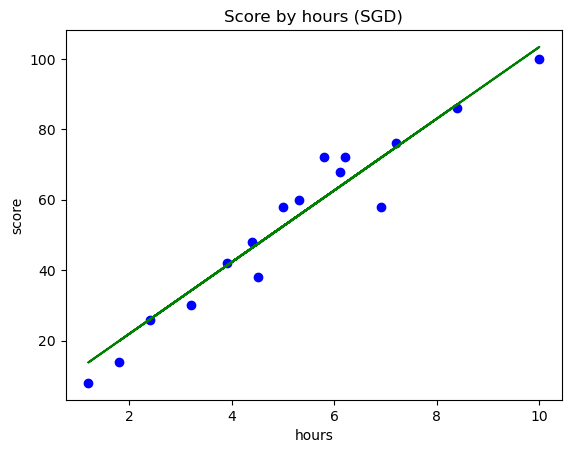

In [10]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, sr.predict(X_train), color="green")
plt.title("Score by hours (SGD)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [12]:
sr.coef_

array([10.17618917])

In [13]:
sr.intercept_

array([1.62024961])

In [15]:
sr.score(X_train, y_train)

0.936838841488928

In [16]:
sr.score(X_test, y_test)

0.9879459932266631